In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#GETTING NECESSARY PACKAGES
from glob import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
from skimage.io import imread

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,MaxPooling2D

from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img

In [0]:
!pip install git+https://github.com/keras-team/keras-preprocessing.git

  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-q2_2926c
  Running command git clone -q https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-q2_2926c
  Created wheel for Keras-Preprocessing: filename=Keras_Preprocessing-1.1.0-cp36-none-any.whl size=42169 sha256=ad6574e06bb9f15a97575bb6dfec3213191ed22a03e5e7f7ff328dfc7f8eade2
  Stored in directory: /tmp/pip-ephem-wheel-cache-6op4dnxg/wheels/03/a0/39/171f6040d36f36c71168dc69afa81334351b20955dc36ce932
Successfully built Keras-Preprocessing


In [0]:
train_f='/content/gdrive/My Drive/chest_xray/train'

In [0]:
os.listdir(train_f)
train_norm=train_f+'/NORMAL/'
train_pneum=train_f+'/PNEUMONIA/'

NORMAL


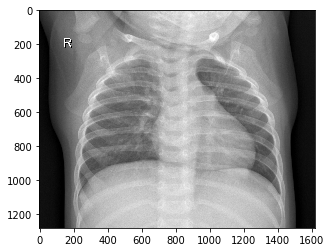

In [0]:
#SEEING A SINGLE INSTANCE
img_name='IM-0122-0001.jpeg'


img_normal=load_img(train_norm+img_name)
print('NORMAL')
plt.imshow(img_normal)
plt.show()


PNEUMONIA AFFECTED


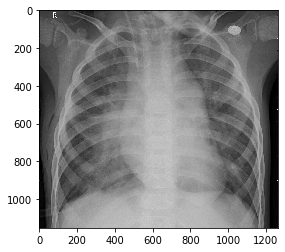

In [0]:
img_name='person12_bacteria_47.jpeg'

img_pneum=load_img(train_pneum+img_name)
print('PNEUMONIA AFFECTED')
plt.imshow(img_pneum)
plt.show()

In [0]:
normal_cases=glob(train_norm+'/*jpeg')
pneumonia_cases=glob(train_pneum+'/*jpeg')
print(len(normal_cases))
print(len(pneumonia_cases))

1333
3883


VISUALIZING DATA

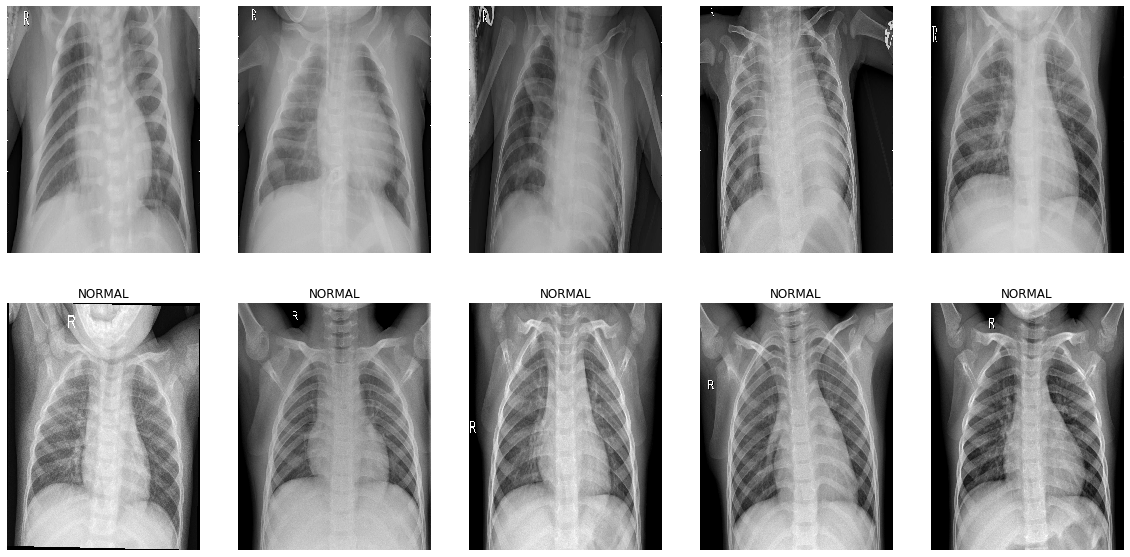

In [0]:
normal=glob(train_norm+'/*.jpeg')
pneumonia=glob(train_pneum+'/*.jpeg')

train_data=[]

for image in normal:
  train_data.append((image,0))

for image in pneumonia:
  train_data.append((image,1))

train_data=pd.DataFrame(train_data,columns=['image','label'],index=None)

train_data=train_data.sample(frac=1.).reset_index(drop=True)

normal_samples=(train_data[train_data['label']==0]['image'].iloc[:5]).tolist()
pneumonia_samples=(train_data[train_data['label']==1]['image'].iloc[:5]).tolist()

samples=pneumonia_samples+normal_samples

#plot
f,ax=plt.subplots(2,5,figsize=(20,10))
for i in range(10):
  img=imread(samples[i])
  ax[i//5, i%5].imshow(img, cmap='gray')
  if i<5:
    ax[i//5, i%5]
  else:
    ax[i//5, i%5].set_title("NORMAL")
  ax[i//5, i%5].axis('off')
  ax[i//5, i%5].set_aspect('auto')
plt.show()


In [0]:
train_data.head(10)

,image,label
0,/content/gdrive/My Drive/chest_xray/train/NORM...,0
1,/content/gdrive/My Drive/chest_xray/train/NORM...,0
2,/content/gdrive/My Drive/chest_xray/train/PNEU...,1
3,/content/gdrive/My Drive/chest_xray/train/PNEU...,1
4,/content/gdrive/My Drive/chest_xray/train/NORM...,0
5,/content/gdrive/My Drive/chest_xray/train/PNEU...,1
6,/content/gdrive/My Drive/chest_xray/train/PNEU...,1
7,/content/gdrive/My Drive/chest_xray/train/PNEU...,1
8,/content/gdrive/My Drive/chest_xray/train/NORM...,0
9,/content/gdrive/My Drive/chest_xray/train/PNEU...,1


In [0]:
train_data.shape[0]


5216

In [0]:
#How size's are:
from PIL import Image

im = Image.open('/content/gdrive/My Drive/subset/pneum subset/person12_bacteria_47.jpeg')
width, height = im.size
print(width,height)

1264 1152


In [0]:
img_width,img_height=150,150

train_samples=5224
batch_size=16
epoch=5
steps=train_samples/batch_size



In [0]:
from keras import backend as k
if k.image_data_format()=='channels_first':
  image_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)

Using TensorFlow backend.


#Creating a CNN model


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [0]:
model.input

<tf.Tensor 'conv2d_input:0' shape=(?, 150, 150, 3) dtype=float32>

In [0]:
model.output

<tf.Tensor 'activation_5/Sigmoid:0' shape=(?, 1) dtype=float32>

In [0]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
image_size= 150
train_samples=5216
batch_size=16

epoch=5
steps=train_samples/batch_size

data_generator_with_aug=ImageDataGenerator(horizontal_flip=True,width_shift_range=0.2,rescale=1./255,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2)
data_generator_with_no_aug=ImageDataGenerator(preprocessing_function=None)


train_gen=data_generator_with_aug.flow_from_directory(directory='/content/gdrive/My Drive/chest_xray/train/',target_size=(image_size,image_size),batch_size=32,class_mode='binary')
val_gen=data_generator_with_no_aug.flow_from_directory(directory='/content/gdrive/My Drive/chest_xray/val/',target_size=(image_size,image_size),batch_size=16,class_mode='binary')
test_gen=data_generator_with_no_aug.flow_from_directory(directory='/content/gdrive/My Drive/chest_xray/test/',target_size=(image_size,image_size),batch_size=32,class_mode='binary')

model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['acc'])
m=model.fit_generator(train_gen,epochs=epoch,validation_data=val_gen)
scores=model.evaluate_generator(test_gen)
print("Accuracy: ",scores[1]*100)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 1652s 10s/step - loss: 0.5446 - acc: 0.7335 - val_loss: 119.5132 - val_acc: 0.5000
Epoch 2/5
163/163 [==============================] - 204s 1s/step - loss: 0.4096 - acc: 0.7648 - val_loss: 34.5734 - val_acc: 0.7500
Epoch 3/5
163/163 [==============================] - 209s 1s/step - loss: 0.3527 - acc: 0.8393 - val_loss: 4.1469 - val_acc: 0.6250
Epoch 4/5
163/163 [==============================] - 206s 1s/step - loss: 0.3183 - acc: 0.8646 - val_loss: 13.1079 - val_acc: 0.8125
Epoch 5/5
163/163 [==============================] - 209s 1s/step - loss: 0.3072 - acc: 0.8729 - val_loss: 7.6739 - val_acc: 0.7500
Accuracy:  79.16666865348816


In [0]:
model.save('final_model.hdf5')


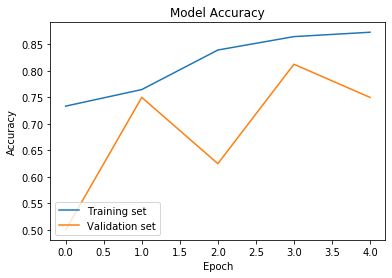

In [0]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='lower left')
plt.show()

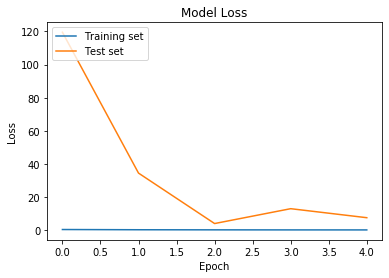

In [0]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [0]:
m.history['acc'][-1]

0.8728911

USING VGG16 model(Transfer Learning)

In [0]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [0]:
IMAGE_SIZE = [224, 224]
train_path = '/content/gdrive/My Drive/chest_xray/train/'
valid_path = '/content/gdrive/My Drive/chest_xray/test/'

Vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

for layer in Vgg.layers:
  layer.trainable = False

folders = glob('/content/gdrive/My Drive/chest_xray/train/*')
x = Flatten()(Vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=Vgg.input, outputs=prediction)
model.summary()

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/chest_xray/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/chest_xray/test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

Epoch 1/5
163/163 [==============================] - 3067s 19s/step - loss: 0.1981 - acc: 0.9229 - val_loss: 0.3750 - val_acc: 0.8910
Epoch 2/5
163/163 [==============================] - 3052s 19s/step - loss: 0.1121 - acc: 0.9601 - val_loss: 0.2885 - val_acc: 0.9103
Epoch 3/5
163/163 [==============================] - 3049s 19s/step - loss: 0.0891 - acc: 0.9676 - val_loss: 0.2820 - val_acc: 0.9199
Epoch 4/5
163/163 [==============================] - 3051s 19s/step - loss: 0.1176 - acc: 0.9588 - val_loss: 0.3724 - val_acc: 0.9135
Epoch 5/5
163/163 [==============================] - 3057s 19s/step - loss: 0.0767 - acc: 0.9707 - val_loss: 0.3790 - val_acc: 0.9119


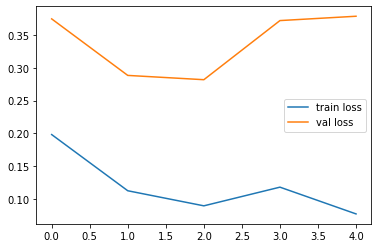

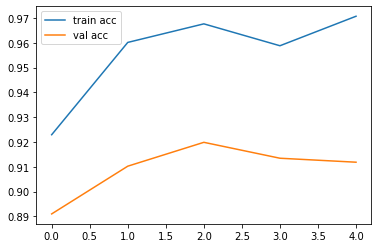

In [0]:
v = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

plt.plot(v.history['loss'], label='train loss')
plt.plot(v.history['val_loss'], label='val loss')
plt.legend()
plt.show()



plt.plot(v.history['acc'], label='train acc')
plt.plot(v.history['val_acc'], label='val acc')
plt.legend()
plt.show()


import tensorflow as tf

from keras.models import load_model

model.save('modelvgg.h5')

In [0]:
import numpy as np
model = load_model('modelvgg.h5')
img = image.load_img('/content/gdrive/My Drive/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
predi = model.predict(img_data)


In [0]:
predi

array([[0., 1.]], dtype=float32)

In [0]:
import numpy as np
model = load_model('modelvgg.h5')
img = image.load_img('/content/gdrive/My Drive/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
pred = model.predict(img_data)


In [0]:
pred

array([[1., 0.]], dtype=float32)

My model got validation accuracy > 90%.It can also be improved by training with architectures.